In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [5]:
df = pd.read_csv('/home/heitor/workspace/PythonDataScience/PythonDataScience/selfit/hist-canc.csv', sep = ',')

In [6]:
df.head()

,contrato,datacancelamento,tipocancelamento,plano,cliente,cpf,sexo,idadecliente,telefonescliente,emailscliente,qtdediaspermanencia,nomeunidade,estadounidade,cidadeunidade,dataultimoacesso
0,1066698,2021-01-01 00:00:00,COMPULSORIO,PLANO SELF LIGHT,ALEXANDRE MAURICIO NUNES DE BARROS,859.234.325-95,MASCULINO,24,(71)996859279,alexandremauricio8@hotmail.com,120,RIO VERMELHO,BAHIA,SALVADOR,2020-01-07 21:03:15.225
1,1077205,2021-01-01 00:00:00,COMPULSORIO,PLANO SELF LIGHT,BRUNA FERNANDES CALEGARI,112.556.676-05,FEMININO,29,(16)991534099,bruna.fcoliveira@hotmail.com,105,PRESIDENTE VARGAS,SÃO PAULO,RIBEIRÃO PRETO,2020-12-17 16:00:36.384
2,1077205,2021-01-01 00:00:00,COMPULSORIO,PLANO SELF LIGHT,BRUNA FERNANDES CALEGARI,112.556.676-05,FEMININO,29,(16)991534099,bruna.fcoliveira@hotmail.com,105,PRESIDENTE VARGAS,SÃO PAULO,RIBEIRÃO PRETO,2020-12-17 16:00:36.384
3,1134727,2021-01-01 00:00:00,COMPULSORIO,PLANO SELF LIGHT,DIEGO HENRIQUE LINS SILVA,032.086.065-59,MASCULINO,33,(87)999499080,diego025@outlook.com,34,TANCREDO NEVES,PERNAMBUCO,PETROLINA,2021-07-06 16:48:04.109
4,975901,2021-01-01 00:00:00,COMPULSORIO,PLANO SELF LIGHT,ERICA MENDES DOS SANTOS,400.766.978-35,FEMININO,30,(14)997716746,mendes.erica.santos@gmail.com,333,MARILIA SHOPPING,SÃO PAULO,MARÍLIA,2020-12-19 10:09:18.547


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318269 entries, 0 to 318268
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   contrato             318269 non-null  int64 
 1   datacancelamento     318269 non-null  object
 2   tipocancelamento     318269 non-null  object
 3   plano                318269 non-null  object
 4   cliente              318269 non-null  object
 5   cpf                  318191 non-null  object
 6   sexo                 318269 non-null  object
 7   idadecliente         318269 non-null  int64 
 8   telefonescliente     318246 non-null  object
 9   emailscliente        318248 non-null  object
 10  qtdediaspermanencia  318269 non-null  int64 
 11  nomeunidade          318269 non-null  object
 12  estadounidade        318269 non-null  object
 13  cidadeunidade        318269 non-null  object
 14  dataultimoacesso     246136 non-null  object
dtypes: int64(3), object(12)
memory usa

In [8]:
#datas para datetime.
df['datacancelamento'] = df['datacancelamento'] = pd.to_datetime(df['datacancelamento'], format='%Y-%m-%d')

Removendo algumas colunas do dataframe...


In [9]:
df = df.drop(
    labels = ['cpf','cliente','telefonescliente', 'emailscliente', 'dataultimoacesso', 'contrato'],
    axis = 1,
    inplace = False
)

Para facilitar, foi alterado o nome de algumas colunas no dataframe.

In [10]:
df = df.rename({'idadecliente': 'idade', 'qtdediaspermanencia': 'permanencia', 'nomeunidade': 'unidade', 'estadounidade': 'estado','cidadeunidade': 'cidade'}, axis='columns')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318269 entries, 0 to 318268
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   datacancelamento  318269 non-null  datetime64[ns]
 1   tipocancelamento  318269 non-null  object        
 2   plano             318269 non-null  object        
 3   sexo              318269 non-null  object        
 4   idade             318269 non-null  int64         
 5   permanencia       318269 non-null  int64         
 6   unidade           318269 non-null  object        
 7   estado            318269 non-null  object        
 8   cidade            318269 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 21.9+ MB


In [14]:
df.head(10)

,datacancelamento,tipocancelamento,plano,sexo,idade,permanencia,unidade,estado,cidade
0,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,MASCULINO,24,120,RIO VERMELHO,BAHIA,SALVADOR
1,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,FEMININO,29,105,PRESIDENTE VARGAS,SÃO PAULO,RIBEIRÃO PRETO
2,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,FEMININO,29,105,PRESIDENTE VARGAS,SÃO PAULO,RIBEIRÃO PRETO
3,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,MASCULINO,33,34,TANCREDO NEVES,PERNAMBUCO,PETROLINA
4,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,FEMININO,30,333,MARILIA SHOPPING,SÃO PAULO,MARÍLIA
5,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,MASCULINO,18,353,MAG SHOPPING,PARAÍBA,JOÃO PESSOA
6,2021-01-01,ESPONTANEO,PLANO SELF LIGHT,FEMININO,22,179,CARAPICUÍBA,SÃO PAULO,CARAPICUÍBA
7,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,FEMININO,27,142,CARUARU,PERNAMBUCO,CARUARU
8,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,FEMININO,27,142,CARUARU,PERNAMBUCO,CARUARU
9,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,FEMININO,34,333,MARILIA SHOPPING,SÃO PAULO,MARÍLIA


Separando DataFrames

In [16]:
df_sp = df[df['estado'] == 'SÃO PAULO']
df_sp.head()

,datacancelamento,tipocancelamento,plano,sexo,idade,permanencia,unidade,estado,cidade
1,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,FEMININO,29,105,PRESIDENTE VARGAS,SÃO PAULO,RIBEIRÃO PRETO
2,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,FEMININO,29,105,PRESIDENTE VARGAS,SÃO PAULO,RIBEIRÃO PRETO
4,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,FEMININO,30,333,MARILIA SHOPPING,SÃO PAULO,MARÍLIA
6,2021-01-01,ESPONTANEO,PLANO SELF LIGHT,FEMININO,22,179,CARAPICUÍBA,SÃO PAULO,CARAPICUÍBA
9,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,FEMININO,34,333,MARILIA SHOPPING,SÃO PAULO,MARÍLIA


In [70]:
df_ba = df[df['estado'] == 'BAHIA']
df_ba.head()

,datacancelamento,tipocancelamento,plano,sexo,idade,permanencia,unidade,estado,cidade
0,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,MASCULINO,24,120,RIO VERMELHO,BAHIA,SALVADOR
18,2021-01-01,COMPULSORIO,PLANO SELF LIGHT SITE,FEMININO,25,148,PITUBA II,BAHIA,SALVADOR
22,2021-01-01,COMPULSORIO,PLANO SELF LIGHT SITE,FEMININO,33,334,COSTA AZUL,BAHIA,SALVADOR
25,2021-01-01,COMPULSORIO,PLANO SELF LIGHT SITE,FEMININO,25,108,RIO VERMELHO,BAHIA,SALVADOR
33,2021-01-01,COMPULSORIO,PLANO SELF PLUS,MASCULINO,36,357,PARALELA,BAHIA,SALVADOR


In [ ]:
df_masc = df[df['sexo'] == 'MASCULINO']
df_masc.head()

,datacancelamento,tipocancelamento,plano,sexo,idadecliente,qtdediaspermanencia,nomeunidade,estadounidade,cidadeunidade
0,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,MASCULINO,24,120,RIO VERMELHO,BAHIA,SALVADOR
3,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,MASCULINO,33,34,TANCREDO NEVES,PERNAMBUCO,PETROLINA
5,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,MASCULINO,18,353,MAG SHOPPING,PARAÍBA,JOÃO PESSOA
11,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,MASCULINO,51,275,COLINAS,SÃO PAULO,SÃO JOSÉ DOS CAMPOS
12,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,MASCULINO,40,279,MANGABEIRA,PARAÍBA,JOÃO PESSOA


In [ ]:
df_fem = df[df['sexo'] == 'FEMININO']
df_fem.head()

,datacancelamento,tipocancelamento,plano,sexo,idadecliente,qtdediaspermanencia,nomeunidade,estadounidade,cidadeunidade
1,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,FEMININO,29,105,PRESIDENTE VARGAS,SÃO PAULO,RIBEIRÃO PRETO
2,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,FEMININO,29,105,PRESIDENTE VARGAS,SÃO PAULO,RIBEIRÃO PRETO
4,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,FEMININO,30,333,MARILIA SHOPPING,SÃO PAULO,MARÍLIA
6,2021-01-01,ESPONTANEO,PLANO SELF LIGHT,FEMININO,22,179,CARAPICUÍBA,SÃO PAULO,CARAPICUÍBA
7,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,FEMININO,27,142,CARUARU,PERNAMBUCO,CARUARU


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318269 entries, 0 to 318268
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   datacancelamento     318269 non-null  datetime64[ns]
 1   tipocancelamento     318269 non-null  object        
 2   plano                318269 non-null  object        
 3   sexo                 318269 non-null  object        
 4   idadecliente         318269 non-null  int64         
 5   qtdediaspermanencia  318269 non-null  int64         
 6   nomeunidade          318269 non-null  object        
 7   estadounidade        318269 non-null  object        
 8   cidadeunidade        318269 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 21.9+ MB


Plotando alguns gráficos interessantes para analisar os dados

(array([143621.,      0.,      0.,      0.,      0., 159408.,      0.,
             0.,      0.,  15240.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

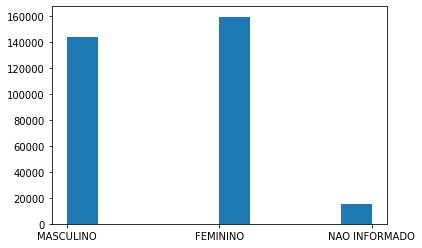

In [ ]:
plt.hist(df['sexo'])

O sexo não é relevante para o estudo, pois obtivemos valores muito próximos nos casos. Apenas sexo "não informado contem pouco cancelamento, porém, isso já é esperado pela forma de cadastro dos clientes. A quantidade de pessoas que não informa o sexo para o cadastro é bem menor.

Análise de correlação entre idade e permanencia não foi relevante.

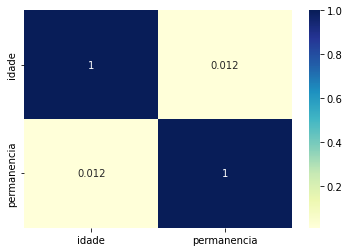

In [17]:
df.corr()
#plotando heatmap de correlação
dataplot = sns.heatmap(df.corr(), cmap = "YlGnBu", annot= True)
plt.show()

In [44]:
df['estado'].value_counts()

BAHIA                  62769
SÃO PAULO              56818
CEARÁ                  29910
PERNAMBUCO             28039
PARÁ                   23164
PARAÍBA                19959
MARANHÃO               17714
ALAGOAS                14899
PIAUÍ                  14760
RIO GRANDE DO NORTE    13652
RIO DE JANEIRO         10845
MATO GROSSO             9629
AMAZONAS                7457
SERGIPE                 4735
MINAS GERAIS            3919
Name: estado, dtype: int64

<AxesSubplot:>

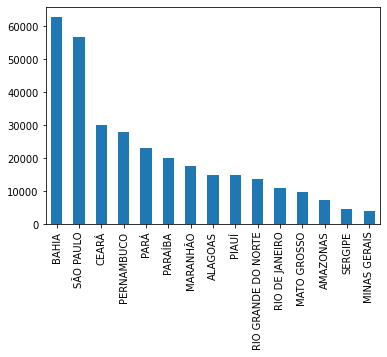

In [32]:
df['estado'].value_counts().plot(kind = 'bar')

Alguns estados tiveram altos números de cancelamento, mas alguns deles contém poucas unidades em comparação a outros... Isso pode ocorrer conforme o fechamento de algumas unidades, em que todos os clientes estarão na situação de cancelado.


Pegando os estados que obtiveram maior número de cancelamentos e analisando as cidades, temos:

<AxesSubplot:>

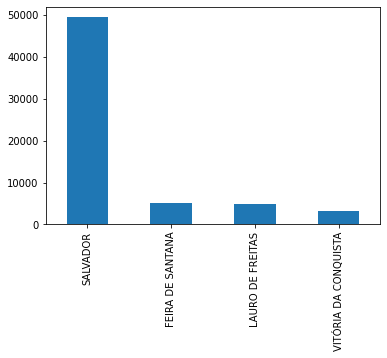

In [71]:
df_ba['cidade'].value_counts().plot(kind= 'bar')

Predominância da cidade de Salvador sobre as demais era esperado, visto que a cidade tem maior pupulação, consequentemente mais concorrência e etc.

<AxesSubplot:>

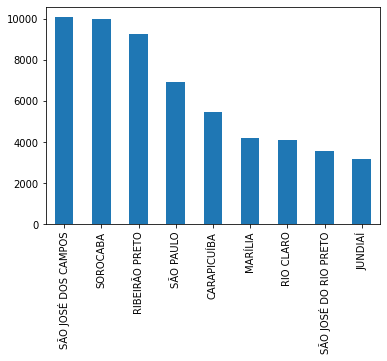

In [66]:
df_sp['cidade'].value_counts().plot(kind= 'bar')

No caso de SP, podemos analisar que SJC teve o maior indice de cancelamento, enquanto São Paulo que tem maior população, ficou em quarto. Isso pode ter acontecido pelo fechamento da unidade de SJC

Analisando a porcentagem dos tipos de Cancelamento.

array([<AxesSubplot:ylabel='tipocancelamento'>], dtype=object)

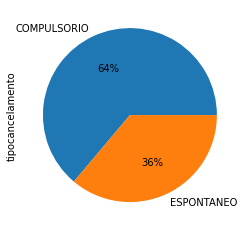

In [ ]:
df['tipocancelamento'].value_counts().plot(kind = 'pie', subplots = True, autopct='%1.0f%%')

Analisando a influência da idade nos cancelamentos.

In [ ]:
df.drop(df[df['idadecliente'] > 99].index, inplace = True)

In [ ]:
df.drop(df[df['idadecliente'] < 8].index, inplace = True)


/home/heitor/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 100.0)

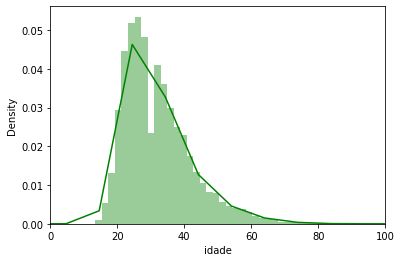

In [69]:
sns.distplot(df['idade'],
            color ='g',
            bins = 1000,
            hist_kws={'alpha':0.4}
            )
plt.xlim(0,100)

array([<AxesSubplot:title={'center':'idadecliente'}>], dtype=object)

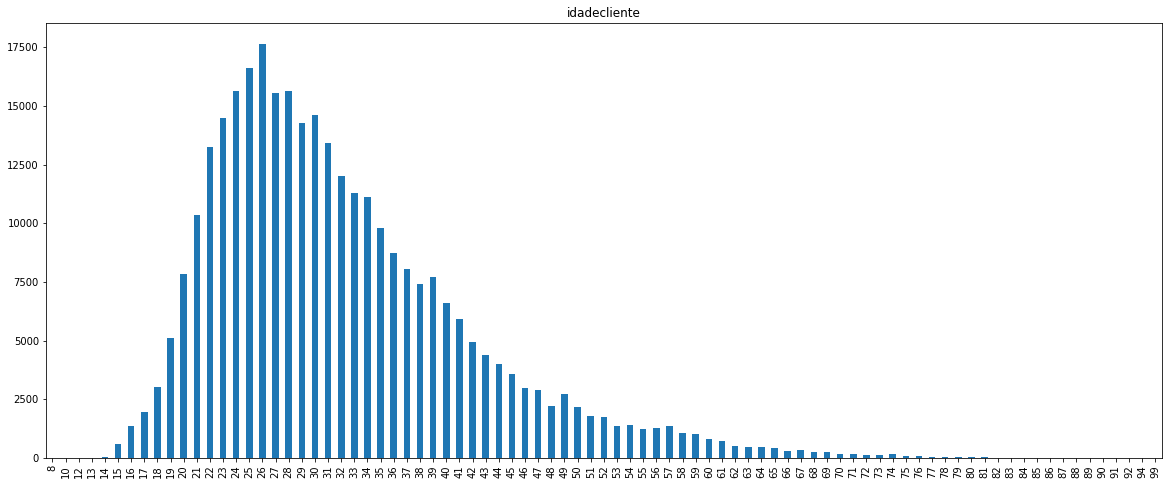

In [ ]:
df['idadecliente'].value_counts().sort_index().plot(kind = 'bar', figsize = (20,8), subplots = True)

(0.0, 100.0)

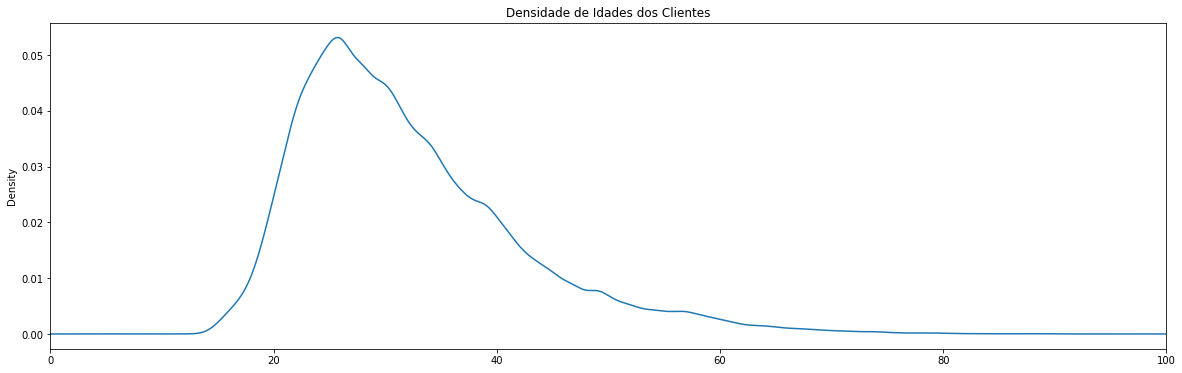

In [ ]:
plt.figure(figsize=(20,6))
#plotando com pandas..
ax = df['idadecliente'].plot(kind = 'kde', subplots = False)
plt.title("Densidade de Idades dos Clientes")
ax.set_xlim(0,100)


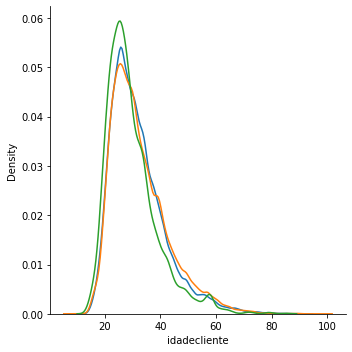

In [ ]:
#fazendo uma anlálise pelo sexo dos clientes, não vemos muita diferença no geral..
sns.FacetGrid(df, hue="sexo", height=5).map(sns.kdeplot, "idadecliente")


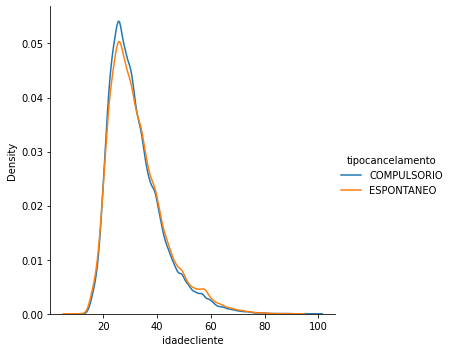

In [ ]:
sns.FacetGrid(df, hue="tipocancelamento", height=5).map(sns.kdeplot, "idadecliente").add_legend()
plt.show()

Analisando a influência da data no número de canc.

In [ ]:
# cria uma coluna chamada 'mes' e coloca o mês da tabela naquela coluna kkk
df['mes'] = df['datacancelamento'].dt.month

In [ ]:
df.mes.value_counts()

4     46068
5     39059
6     37949
7     30049
3     28147
2     27847
1     27567
8     20816
9     18646
10    16542
11    14245
12    11066
Name: mes, dtype: int64

Text(0.5, 1.0, 'Quantidades de Cancelamento por Meses do ano de 2021')

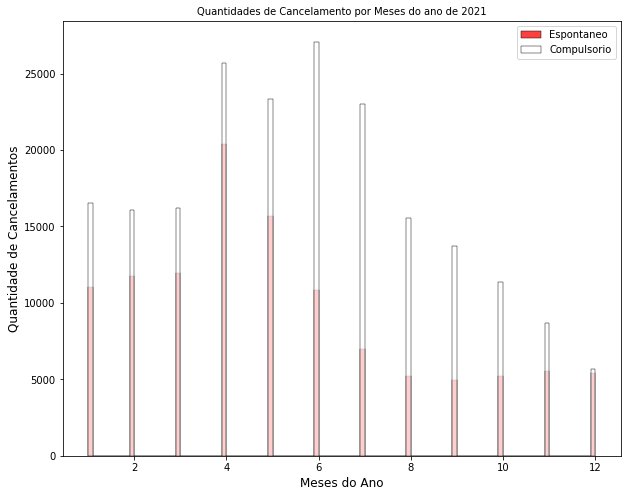

In [ ]:
#plotando com Seaborn
plt.figure(figsize= (10,8))
#para o cancelamento espontâneo
sns.histplot(df.loc[df['tipocancelamento'] == 'ESPONTANEO']['mes'],
             binwidth = 0.1,
             color='red',
            )
            
#para o compulsório
sns.histplot(df.loc[df['tipocancelamento'] == 'COMPULSORIO']['mes'],
             binwidth = 0.1,
             color='white')


plt.legend(labels = ['Espontaneo','Compulsorio'])
# Set label for x-axis
plt.xlabel( "Meses do Ano" , size=12)
# Set label for y-axis
plt.ylabel( "Quantidade de Cancelamentos" , size=12)
# Set title for figure
plt.title( "Quantidades de Cancelamento por Meses do ano de 2021" , size=10)
#colocando o limite do eixo x
#plt.xlim(0.1,14)

#plt.xticks(rotation=45,horizontalalignment='right',fontweight='light')

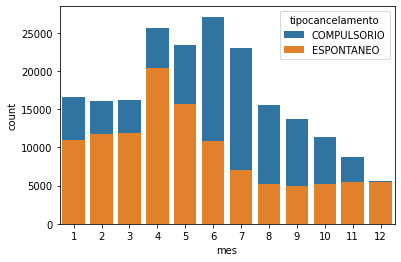

In [ ]:
sns.countplot(x = 'mes', hue = 'tipocancelamento', data= df, dodge = False)
sns.set_palette("tab10")

Os meses de maior cancelamento ocorrearam entre Abril e Junho, quando em 2021 foi aderido novamente o lockdown no Brasil.

In [ ]:
df['estadounidade'].value_counts()

BAHIA                  62724
SÃO PAULO              56780
CEARÁ                  29888
PERNAMBUCO             28013
PARÁ                   23146
PARAÍBA                19956
MARANHÃO               17681
ALAGOAS                14893
PIAUÍ                  14753
RIO GRANDE DO NORTE    13650
RIO DE JANEIRO         10838
MATO GROSSO             9581
AMAZONAS                7453
SERGIPE                 4729
MINAS GERAIS            3916
Name: estadounidade, dtype: int64

<AxesSubplot:xlabel='mes', ylabel='count'>

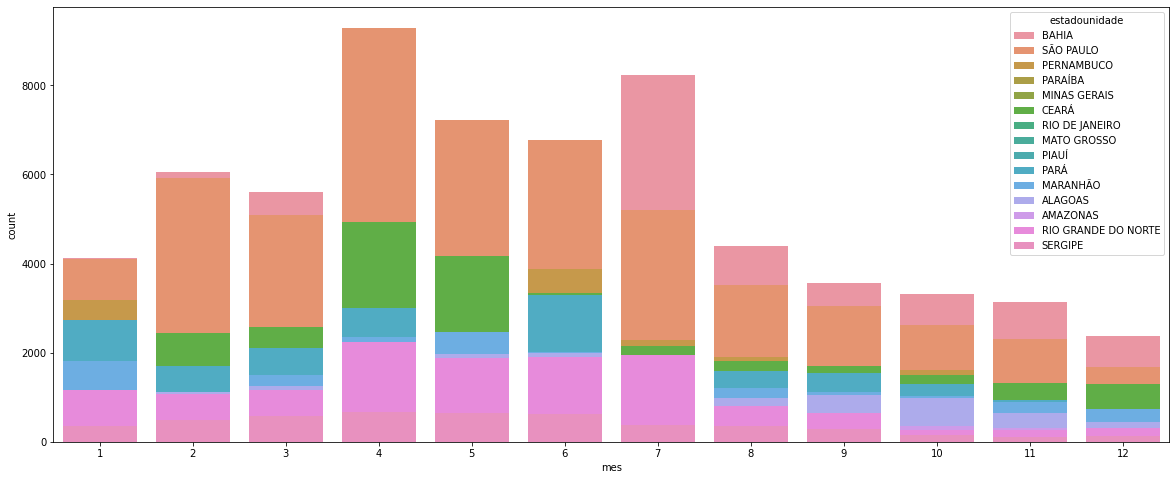

In [ ]:
#f, axes = plt.subplots(1,15)
plt.figure(figsize=(20,8))
sns.countplot(x = 'mes', hue = 'estadounidade', data= df, dodge = False)


Analisando os comportamento dos estados em relação aos meses para ver se ocorre alguma predominância de cancelamento em climas frios, regiões, etc.

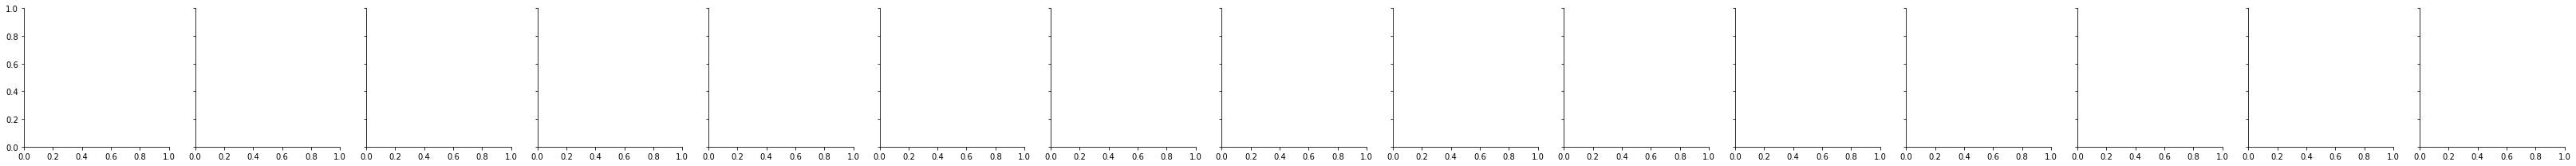

In [ ]:

grid = sns.FacetGrid(df, col = "estadounidade")

/home/heitor/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


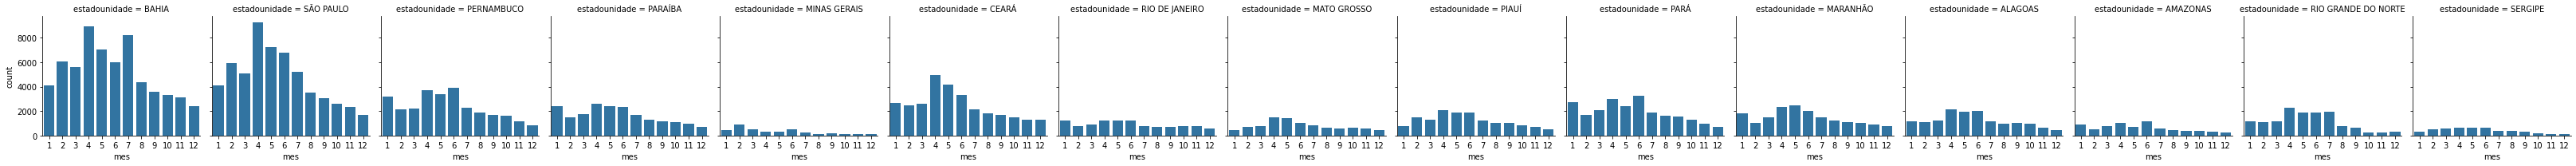

In [ ]:
grid = sns.FacetGrid(df, col = "estadounidade")
grid = grid.map(sns.countplot, "mes")


In [ ]:
grid = sns.FacetGrid(df, col = "estadounidade", row = 'nomeunidade')
grid = grid.map(sns.scatterplot, "mes")

In [ ]:
df.head()

,datacancelamento,tipocancelamento,plano,sexo,idadecliente,qtdediaspermanencia,nomeunidade,estadounidade,cidadeunidade,mes
0,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,MASCULINO,24,120,RIO VERMELHO,BAHIA,SALVADOR,1
1,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,FEMININO,29,105,PRESIDENTE VARGAS,SÃO PAULO,RIBEIRÃO PRETO,1
2,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,FEMININO,29,105,PRESIDENTE VARGAS,SÃO PAULO,RIBEIRÃO PRETO,1
3,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,MASCULINO,33,34,TANCREDO NEVES,PERNAMBUCO,PETROLINA,1
4,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,FEMININO,30,333,MARILIA SHOPPING,SÃO PAULO,MARÍLIA,1


,datacancelamento,tipocancelamento,plano,sexo,idadecliente,qtdediaspermanencia,nomeunidade,cidadeunidade,mes
estadounidade,,,,,,,,,
ALAGOAS,2021-01-01,COMPULSORIO,PLANO SELF PLUS,FEMININO,25,321,MANGABEIRAS,MACEIÓ,1
AMAZONAS,2021-01-02,COMPULSORIO,PLANO SELF LIGHT,MASCULINO,28,60,N.SRA DAS GRAÇAS,MANAUS,1
BAHIA,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,MASCULINO,24,120,RIO VERMELHO,SALVADOR,1
CEARÁ,2021-01-01,COMPULSORIO,PLANO SELF LIGHT SITE,FEMININO,22,354,SHOPPING PARANGABA,FORTALEZA,1
MARANHÃO,2021-01-01,COMPULSORIO,PLANO SELF PLUS,FEMININO,36,332,BOULEVARD TROPICAL,SÃO LUÍS,1
MATO GROSSO,2021-01-01,COMPULSORIO,PLANO SELF LIGHT SITE,MASCULINO,32,94,ESTAÇÃO CUIABÁ,CUIABÁ,1
MINAS GERAIS,2021-01-01,ESPONTANEO,PLANO SELF LIGHT,FEMININO,19,306,CIDADE JARDIM,BELO HORIZONTE,1
PARAÍBA,2021-01-01,COMPULSORIO,PLANO SELF LIGHT,MASCULINO,18,353,MAG SHOPPING,JOÃO PESSOA,1
PARÁ,2021-01-01,COMPULSORIO,PLANO SELF LIGHT SITE,FEMININO,54,78,MENDONÇA FURTADO,SANTARÉM,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318001 entries, 0 to 318268
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   datacancelamento     318001 non-null  datetime64[ns]
 1   tipocancelamento     318001 non-null  object        
 2   plano                318001 non-null  object        
 3   sexo                 318001 non-null  object        
 4   idadecliente         318001 non-null  int64         
 5   qtdediaspermanencia  318001 non-null  int64         
 6   nomeunidade          318001 non-null  object        
 7   estadounidade        318001 non-null  object        
 8   cidadeunidade        318001 non-null  object        
 9   mes                  318001 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 34.8+ MB


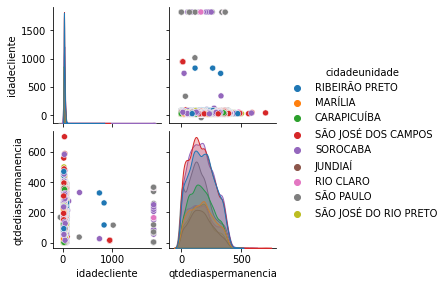

In [ ]:
_ = sns.pairplot(df_sp, hue = "cidadeunidade", height = 2, diag_kind = 'kde')